<a href="https://colab.research.google.com/github/haticebaydemir/SentimentyBot/blob/main/SentimentyBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Görev 1: Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

## Adım 1
'tweets_labeled.csv' adlı dosyayı okutunuz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import pandas as pd

# Zip dosyasının konumunu belirleyin
zip_path = '/content/drive/MyDrive/SentimentyBot/SentimentyBot.zip'

# Zip dosyasını açın
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Zip içerisindeki dosyaları listeleyin
    zip_ref.printdir()

    # CSV dosyasını açıp okuma işlemini yapın
    with zip_ref.open('SentimentyBot/tweets_labeled.csv') as csv_file:
        df = pd.read_csv(csv_file)

# Veriyi görüntüleyin
df.head()

File Name                                             Modified             Size
SentimentyBot/                                 2023-05-23 16:23:56            0
SentimentyBot/sentimentyBot_feature.py         2023-05-23 16:06:14         4264
SentimentyBot/tweets_labeled.csv               2023-05-23 16:06:10      2356472
SentimentyBot/tweets_21.csv                    2023-05-23 16:06:22      2011968
SentimentyBot/sentimentyBot_pipeline.py        2023-05-23 16:06:18         3594
SentimentyBot/sentimentyBot_casestudy.pdf      2023-05-23 16:06:12      1135038


,tweet_id,tweet,date,label
0,1606767075984375808,Berk Ali (kedim) seni çok özledim. Ölmek için ...,2022-12-24 21:41:37+00:00,1
1,1537178207677448193,"Yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-15 21:00:18+00:00,1
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-13 21:21:36+00:00,1
3,1495413883166760960,"Öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 15:03:47+00:00,1
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 20:22:32+00:00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  12960 non-null  int64 
 1   tweet     12959 non-null  object
 2   date      12960 non-null  object
 3   label     12960 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 405.1+ KB


## Adım 2
Eksik değer analizi yapınız, eksik değerler için gerekli işlemleri uygulayınız.

In [ ]:
df.isnull().sum() # Her sütunda bulunan eksik (null) değerlerin sayısını döndürür.

,0
tweet_id,0
tweet,1
date,0
label,0


In [ ]:
df = df.dropna() # Null değer içeren satırları DataFrame'den siler ve güncellenmiş haliyle df'ye atar.

## Adım 3
'date' değişkeni saat dilim, GMT+03:00 olacak şekilde güncelleyiniz.


In [ ]:
df["date"] = pd.to_datetime(df["date"])  # Tarihleri datetime formatına çevir
df["date"] = df["date"].dt.tz_convert("Europe/Istanbul")  # Zaman dilimini İstanbul'a çevir
df["date"] = df["date"].dt.tz_localize(None)  # Zaman dilimini kaldır

<ipython-input-131-22eaab5870e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])  # Tarihleri datetime formatına çevir
<ipython-input-131-22eaab5870e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = df["date"].dt.tz_convert("Europe/Istanbul")  # Zaman dilimini İstanbul'a çevir
<ipython-input-131-22eaab5870e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
# Eğer tek satırda yazmak istersek.
# df["date"] = pd.to_datetime(df["date"]).dt.tz_localize("Europe/Istanbul", ambiguous='infer').dt.tz_localize(None)
# "date" sütununu datetime formatına çevirir, İstanbul zaman dilimini ayarlar ve zaman dilimi bilgisini kaldırır.

In [ ]:
df["date"]

,date
0,2022-12-25 00:41:37
1,2022-06-16 00:00:18
2,2022-06-14 00:21:36
3,2022-02-20 18:03:47
4,2022-02-06 23:22:32
...,...
12955,2022-03-15 18:09:09
12956,2022-12-29 21:34:09
12957,2022-03-14 00:55:30
12958,2022-09-15 02:31:51


## Adım 4
'date' değişkenini baz alarak aşağıdaki 3 değişkeni oluşturunuz.

-mevsim

-gün

-4 saatlik periyotlar(örneğin: 22:00-02:00, 02:00-06:00, 06:00-10:00, 10:00-14:00, 14:00-18:00, 18:00-22:00)

In [ ]:
# "month" değişkenini oluştur ve düzenle.
df["month"] = df["date"].dt.month_name()
df['tweet'] = df['tweet'].str.lower()
df["month"] = df["month"].replace({"January": "Ocak",
                                   "February": "Şubat",
                                   "March": "Mart",
                                   "April": "Nisan",
                                   "May": "Mayıs",
                                   "June": "Haziran",
                                   "July": "Temmuz",
                                   "August": "Ağustos",
                                   "September": "Eylül",
                                   "October": "Ekim",
                                   "November": "Kasım",
                                   "December": "Aralık"})

In [ ]:
# Aylar ile ilişkili mevsimleri tutacak bir değişken oluşturma işlemi.
seasons = {"Ocak": "Kış",
           "Şubat": "Kış",
           "Mart": "İlkbahar",
           "Nisan": "İlkbahar",
           "Mayıs": "İlkbahar",
           "Haziran": "Yaz",
           "Temmuz": "Yaz",
           "Ağustos": "Yaz",
           "Eylül": "Sonbahar",
           "Ekim": "Sonbahar",
           "Kasım": "Sonbahar",
           "Aralık": "Kış"}

df["seasons"] = df["month"].map(seasons)

In [ ]:
# "days" değişkenini oluştur ve düzenle.
# df["days"] = df["date"].dt.day_name()
df["days"] = [date.strftime('%A') for date in df["date"]]
df["days"] = df["days"].replace({"Monday": "Pazartesi",
                                 "Tuesday": "Salı",
                                 "Wednesday": "Çarşamba",
                                 "Thursday": "Perşembe",
                                 "Friday": "Cuma",
                                 "Saturday": "Cumartesi",
                                 "Sunday": "Pazar"})
df.head()

,tweet_id,tweet,date,label,month,seasons,days
0,1606767075984375808,berk ali (kedim) seni çok özledim. ölmek için ...,2022-12-25 00:41:37,1,Aralık,Kış,Pazar
1,1537178207677448193,"yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-16 00:00:18,1,Haziran,Yaz,Perşembe
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-14 00:21:36,1,Haziran,Yaz,Salı
3,1495413883166760960,"öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 18:03:47,1,Şubat,Kış,Pazar
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 23:22:32,1,Şubat,Kış,Pazar


In [ ]:
# Günü 4 saatlik zaman aralıklarına böl.
df["hour"] = df["date"].dt.hour
df["4_hour_interval"] = (df["hour"] // 2) * 2

interval = {0: "0-2",
            2: "2-4",
            4: "4-6",
            6: "6-8",
            8: "8-10",
            10: "10-12",
            12: "12-14",
            14: "14-16",
            16: "16-18",
            18: "18-20",
            20: "20-22",
            22: "22-24"}

df["4_hour_interval"] = df["4_hour_interval"].map(interval)
df["time_interval"] = df["4_hour_interval"].replace({"22-24": "22-02",
                                                     "0-2": "22-02",
                                                     "2-4": "02-06",
                                                     "4-6": "02-06",
                                                     "6-8": "06-10",
                                                     "8-10": "06-10",
                                                     "10-12": "10-14",
                                                     "12-14": "10-14",
                                                     "14-16": "14-18",
                                                     "16-18": "14-18",
                                                     "18-20": "18-22",
                                                     "20-22": "18-22"
                                                     })
df.drop(["hour", "4_hour_interval"], axis=1, inplace=True)
df.head()

,tweet_id,tweet,date,label,month,seasons,days,time_interval
0,1606767075984375808,berk ali (kedim) seni çok özledim. ölmek için ...,2022-12-25 00:41:37,1,Aralık,Kış,Pazar,22-02
1,1537178207677448193,"yani, öylesine ciddiye alacaksın ki yaşamayı, ...",2022-06-16 00:00:18,1,Haziran,Yaz,Perşembe,22-02
2,1536458790802972673,saçlarının gölgesinde\nölmek ne güzeldi,2022-06-14 00:21:36,1,Haziran,Yaz,Salı,22-02
3,1495413883166760960,"öyle güzel baktın ki, gözlerime\nsevmek değil ...",2022-02-20 18:03:47,1,Şubat,Kış,Pazar,18-22
4,1490420667614904334,sevmek biri için ölmek değil her şeye rağmen y...,2022-02-06 23:22:32,1,Şubat,Kış,Pazar,22-02


## Adım 5
'label' değişkenini aşağıdaki gibi düzenleyiniz.

1:pozitif

-1:negatif

0:nötr

In [ ]:
# Değişkenleri değiştir.
df["label"] = df["label"].replace({-1: "negative",
                                    0: "nötr",
                                    1: "positive"})


## Adım 6 - 7
Numerik ve kategorik değişkenleri yakalayınız.

Hedef değişken analizi yapınız.


               time_interval      Ratio
time_interval                          
22-02                   1181  40.668044
18-22                    616  21.212121
14-18                    359  12.362259
10-14                    326  11.225895
02-06                    261   8.987603
06-10                    161   5.544077
---------------------------------------------


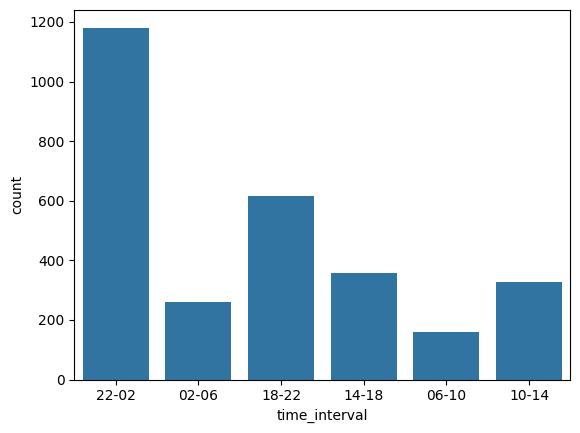

           days      Ratio
days                      
Salı        451  15.530303
Pazartesi   435  14.979339
Cuma        433  14.910468
Pazar       417  14.359504
Perşembe    408  14.049587
Çarşamba    388  13.360882
Cumartesi   372  12.809917
---------------------------------------------


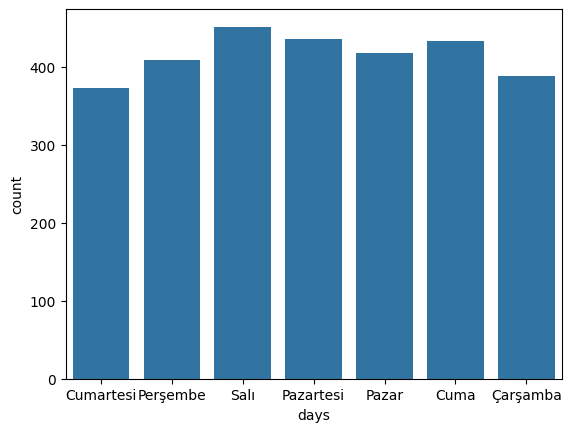

          seasons      Ratio
seasons                     
Kış           999  34.400826
Sonbahar      705  24.276860
Yaz           633  21.797521
İlkbahar      567  19.524793
---------------------------------------------


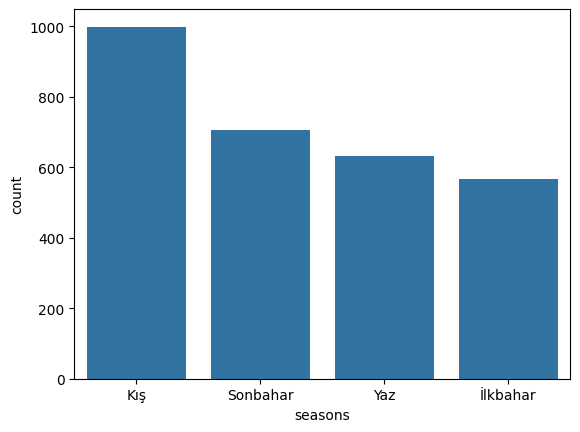

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # matplotlib'ı ekleyin, eğer grafik çiziyorsanız

# Hedef değişken analizi
cols = ["time_interval", "days", "seasons"]

def summary(dataframe, col_name, plot=False):
    # Negatif tweetler için hedef değişken analizi
    dataframe = dataframe.loc[df["label"] == "negative"]
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("---------------------------------------------")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cols:
    summary(df, col, plot=True)

# Görev 2: Veriyi Hazırlama ve Logistic Regression


## Adım 1-2-3:

Adım 1: 'tweet' değişkeninin harflerini küçük harfe çeviriniz.

Adım 2: label encoding işlemi uygulayarak 'label' değişkenini sayısal olarak ifade ediniz.

Adım 3: 'tweet' değişkenini kullanarak TF-IDF matrisini oluşturunuz.

In [ ]:
def data_preparation(dataframe, tf_idfVectorizer):
    """
    Prepare data for model,
        put "label" variable into Label Encoder.
        put "tweet" variable into TF-IDF.

    :param dataframe: dataframe
    :param tf_idfVectorizer: TF-IDF Model


    :return x: TF_IDF matrix
    :return y: the dependent variable

    """
    # Adım 1: 'tweet' değişkeninin harflerini küçük harfe çeviriniz.
    dataframe["tweet"] = dataframe["tweet"].str.lower()

    # Adım 2: Label encoding işlemi uygulayarak 'label' değişkenini sayısal olarak ifade ediniz.
    # replace işlemlerini doğrudan atama ile yapıyoruz
    dataframe["label"] = dataframe["label"].replace(-1, "negative")
    dataframe["label"] = dataframe["label"].replace(0, "neutral")
    dataframe["label"] = dataframe["label"].replace(1, "positive")


    dataframe["label"] = LabelEncoder().fit_transform(dataframe["label"])

    # Adım 3: 'tweet' değişkenini kullanarak TF-IDF matrisini oluşturunuz.
    dataframe.dropna(axis=0, inplace=True)  # NaN değerlerini kaldır
    X = tf_idfVectorizer.fit_transform(dataframe["tweet"])
    y = dataframe["label"]

    return X,y

## Adım 4:
TF-IDF matrisini ve 'label' hedef değişkenini kullanrak logistic regression modelini kurunuz, accuracy'yi değerlendiriniz.


In [ ]:
def logistic_regression(X, y):
    """
    Creating Logistic Regression model

    :param X: TF-IDF matrix
    :param y: the dependent variable


    :return log_model: Model object
    """

    log_model = LogisticRegression(max_iter=10000).fit(X, y)
    cross_val_score(log_model,
                    X,
                    y,
                    scoring="accuracy",
                    cv=10).mean()
    return log_model

# Görev 3: Tweetlerde Duygu Tahmini



## Adım 1:
'tf_idfvectorizer' ve logistic regression modelini kullanarak 2021 yılına ait tweetler için tahmin işlemini gerçekleştiriniz.


In [ ]:
import zipfile
import pandas as pd

# Zip dosyasının yolunu belirtin
zip_path = '/content/drive/MyDrive/SentimentyBot/SentimentyBot.zip'

# Zip dosyasını açın
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Zip içerisindeki dosyaları listeleyin
    zip_ref.printdir()

    # CSV dosyasını zipten okuyun
    with zip_ref.open('SentimentyBot/tweets_21.csv') as csv_file:
        dataframe_new = pd.read_csv(csv_file)

# Veriyi görüntülemek için
print(dataframe_new.head())


File Name                                             Modified             Size
SentimentyBot/                                 2023-05-23 16:23:56            0
SentimentyBot/sentimentyBot_feature.py         2023-05-23 16:06:14         4264
SentimentyBot/tweets_labeled.csv               2023-05-23 16:06:10      2356472
SentimentyBot/tweets_21.csv                    2023-05-23 16:06:22      2011968
SentimentyBot/sentimentyBot_pipeline.py        2023-05-23 16:06:18         3594
SentimentyBot/sentimentyBot_casestudy.pdf      2023-05-23 16:06:12      1135038
              tweet_id                                              tweet                 date
0  1344798002490314752  Kardesim (12) sevdigi cocuga 00:00 da ilan-i a...  2021-01-01 03:10:03
1  1344799527673470977  Bu yılbaşı da saat tam 00:00'da swni seviyorum...  2021-01-01 03:16:07
2  1344799907719348226  tam 00.00da naptınız ben her yıl tam bu vakit ...  2021-01-01 03:17:37
3  1344800782802165762  00:00'da havai fişek gösterisi yapıl

In [ ]:
def tweets_21(dataframe_new, tweets):
    """
    tweetlerin lowercase yapılması, modele hazırlanması

    Parameters
    ----------
        dataframe_new : tweetleri içeren dataframe
        tweets : dataframe_new'deki tweetleri içeren değişken

    Returns
    -------
        dataframe_new : düzenlenen tweetleri içeren dataframe

    """

    # tweetlerin küçük harfe çevrilemsi
    dataframe_new[tweets] = dataframe_new[tweets].apply(lambda x: " ".join(x.lower() for x in x.split()))


    return dataframe_new

## Adım 2:
'label' adlı bir değişken oluşturunuz ve tahminleri bu değişkenin altına kaydediniz.

In [ ]:
def predict_new_tweet(dataframe_new, log_model, tf_idfVectorizer):
    """
    2021 yılına ait weetlerin kurulmuş olan Logistic Regression modeli ile duygusunun
    (pozitif, negatif ya da nötr olarak)tahmin edilmesi

    Parameters
    ----------
        dataframe_new : modele girmek üzere original tweets fonksiyonunda düzenlenmiş tweetleri içeren dataframe
        log_model : Logistic Regression model nesnesi
        tf_idfVectorizer

    Returns
    -------
        dataframe_new : username, tweet ve model tarfından tahmin edilen label'ları içeren dataframe

    """
    tweet_tfidf = tf_idfVectorizer.transform(dataframe_new["tweet"])
    predictions = log_model.predict(tweet_tfidf)
    dataframe_new["label"] = predictions
    return dataframe_new

## Adım 3:
İşlemlerinizi fonksiyonlaştırınız ve pipelinde dosyası oluşturunuz.

In [ ]:
from google.colab import drive
import zipfile
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Google Drive'ı bağla
drive.mount('/content/drive')

# Zip dosyasının tam yolu
zip_file_path = '/content/drive/MyDrive/SentimentyBot/SentimentyBot.zip'

# Zip dosyasını çıkartacağınız dizin
extract_dir = '/content/zip_dosyasi/'

# Dizin mevcut değilse oluştur
os.makedirs(extract_dir, exist_ok=True)

# Zip dosyasını aç
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Çıkartılan dosyaları listele
print("Çıkarılan dosyalar:")
print(os.listdir(extract_dir))

# CSV dosyalarını okuma
dataframe = pd.read_csv(os.path.join(extract_dir, 'SentimentyBot/tweets_labeled.csv'))
dataframe_new = pd.read_csv(os.path.join(extract_dir, 'SentimentyBot/tweets_21.csv'))

def main():
    # Doğru dosya yollarını kullan
    tf_idfVectorizer = TfidfVectorizer()
    X, y = data_preparation(dataframe, tf_idfVectorizer)
    log_model = logistic_regression(X, y)

    # Yeni tweetleri tahmin et
    predicted_df = predict_new_tweet(dataframe_new, log_model, tf_idfVectorizer)

if __name__ == "__main__":
    print("The process has started.")
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Çıkarılan dosyalar:
['SentimentyBot']
The process has started.
